### Test the PARC framework using the Ebner data

- [Link](http://cse.lab.imtlucca.it/~bemporad/parc/)

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import plotly.express as px
import plotly.graph_objects as go
from parc import PARC
from sklearn.model_selection import train_test_split

`polytope` failed to import `cvxopt.glpk`.
will use `scipy.optimize.linprog`


In [2]:
DATA_PATH = Path('../../Data/ebner/')
FILE = 'Ebner.txt'

In [3]:
df = pd.read_csv(DATA_PATH / FILE)

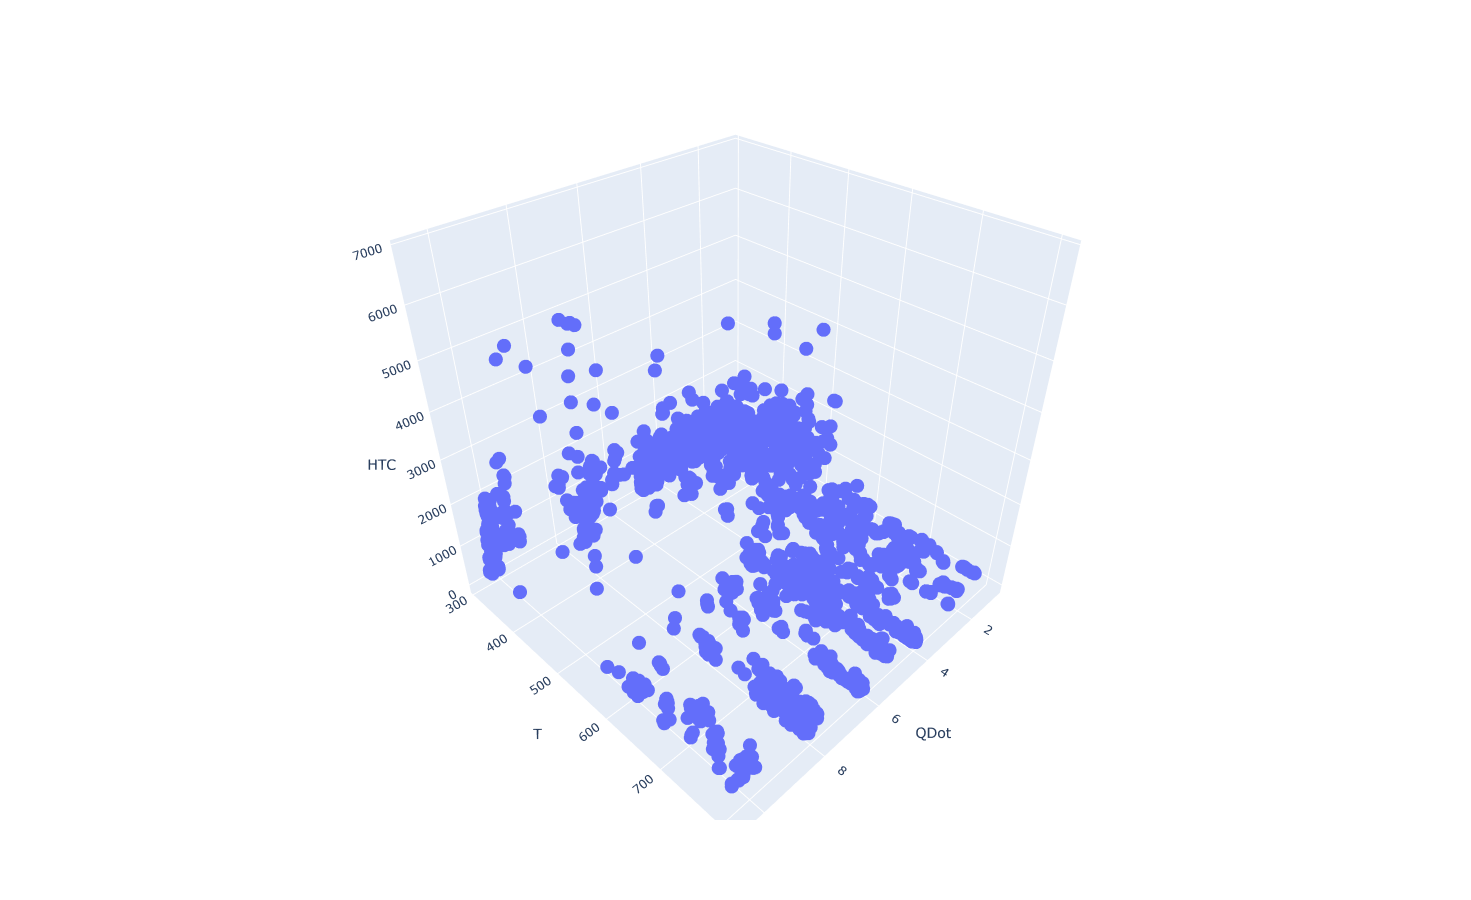

In [5]:
fig = px.scatter_3d(df, x="QDot", y="T", z="HTC", width=1200, height=900)
fig.show()

In [6]:
# train-test split
train, test = train_test_split(df, test_size=0.25)
X_train = train[["QDot","T"]].values
Y_train = train[["HTC"]].values.ravel()
X_test = test[["QDot","T"]].values
Y_test = test[["HTC"]].values.ravel()


In [9]:
df["InTrainSet"] = 0
# add index to make plotting easier
for idx in df.index:
    if idx in train.index.values:
        df["InTrainSet"][idx] = 1
        

C:\Users\WeberJ\Miniconda3\envs\parc\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



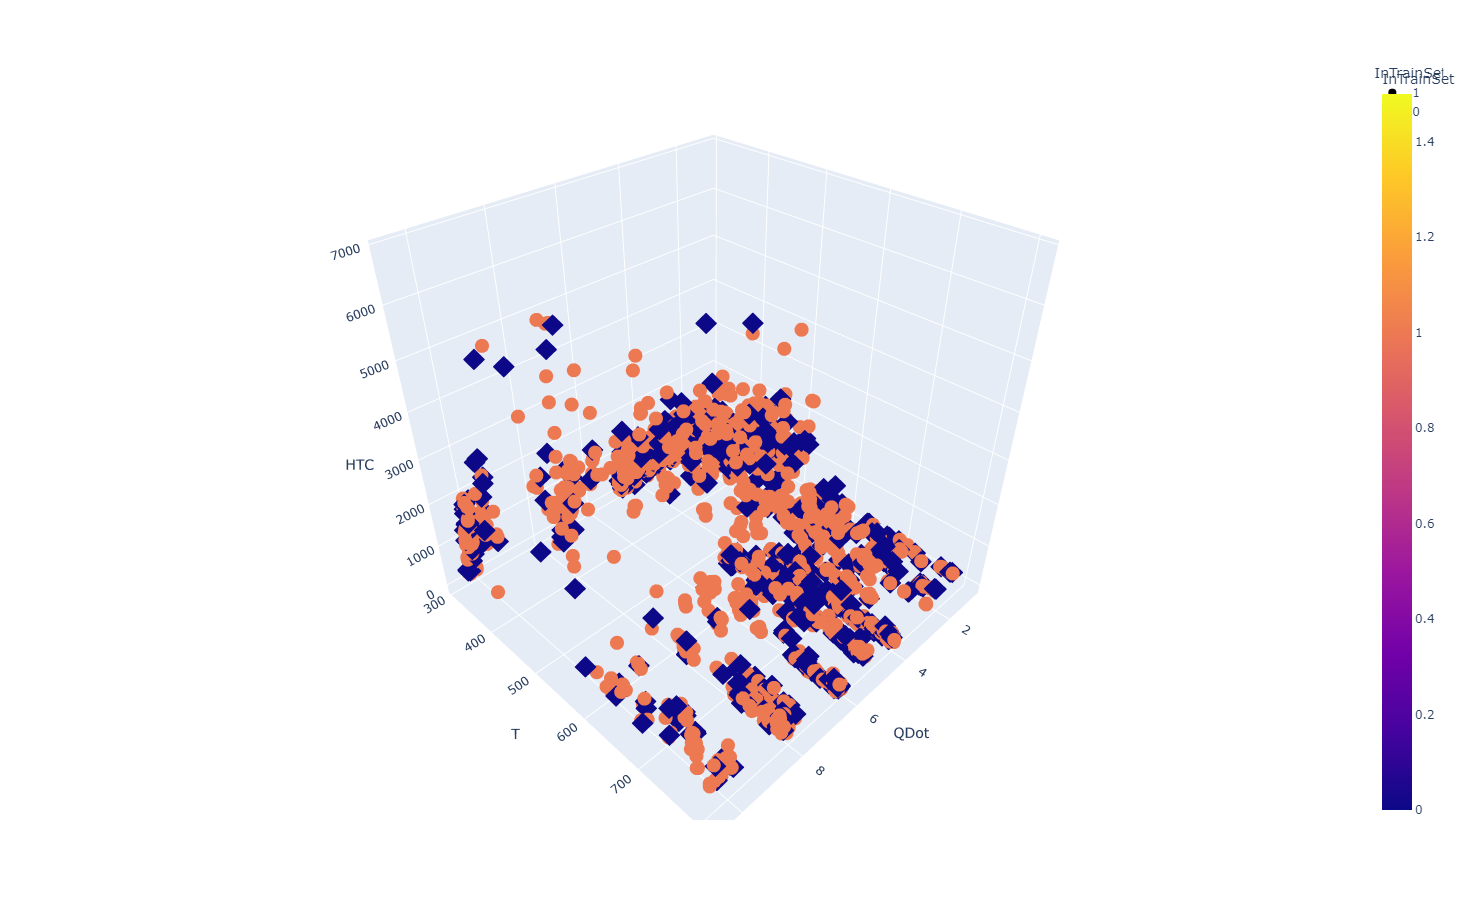

In [10]:
fig = px.scatter_3d(df, x="QDot", y="T", z="HTC", width=1200, height=900, color="InTrainSet", symbol="InTrainSet")
fig.show()

In [13]:
K = 10
separation = 'Softmax'
# separation='Voronoi'
sigma = 1
alpha = 1.0e-3
beta = 1.0e-3
softmax_maxiter = 100000
maxiter = 15

In [14]:
predictor = PARC(K=K, alpha=alpha, sigma=sigma, separation=separation, maxiter=maxiter,
                 cost_tol=1e-4, min_number=10, fit_on_partition=True,
                 beta=beta, verbose=1)

# Y_hat, delta_hat = predictor.predict(X_test) # predict targets

predictor.fit(X_train, Y_train, False, weights=np.ones(1))

score_train = predictor.score(X_train, Y_train)  # compute R2 score on training data
score_test = predictor.score(X_test, Y_test)  # compute R2 score on test data

print("\nResults:\n")
print("Training data: %6.2f %%" % (score_train * 100))
print("Test data:     %6.2f %%" % (score_test * 100))
print("--------------------\n")

C:\Users\WeberJ\Miniconda3\envs\parc\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



iter =   1, cost = 34896018.9893


C:\Users\WeberJ\Miniconda3\envs\parc\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



iter =   2, cost = 24270667.6196


C:\Users\WeberJ\Miniconda3\envs\parc\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



iter =   3, cost = 21632726.4840
iter =   4, cost = 20405178.6855
iter =   5, cost = 19855315.1047
iter =   6, cost = 19229827.9971
iter =   7, cost = 18522142.7485
iter =   8, cost = 17932876.2876
iter =   9, cost = 17607441.6268
iter =  10, cost = 17341256.6689
iter =  11, cost = 17046501.1741
iter =  12, cost = 16890866.0982
iter =  13, cost = 16791237.0008
iter =  14, cost = 16714321.2137
iter =  15, cost = 16632918.3453

Results:

Training data:  67.01 %
Test data:      64.34 %
--------------------



In [17]:
Y_pred = predictor.predict(X_test)

In [37]:
fig = go.Figure()
fig.add_trace(go.Scatter3d(x=X_test[:,0], y=X_test[:,1], z=Y_test, mode="markers", name="test data"))
fig.add_trace(go.Scatter3d(x=X_test[:,0], y=X_test[:,1], z=Y_pred[0].ravel(), mode="markers", marker=dict(color="red"), name="prediciton"))

fig.update_layout(
    height=900, width=1200)


C:\Users\WeberJ\Miniconda3\envs\parc\lib\site-packages\ipykernel_launcher.py:50: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



AttributeError: 'PARC' object has no attribute 'delta'

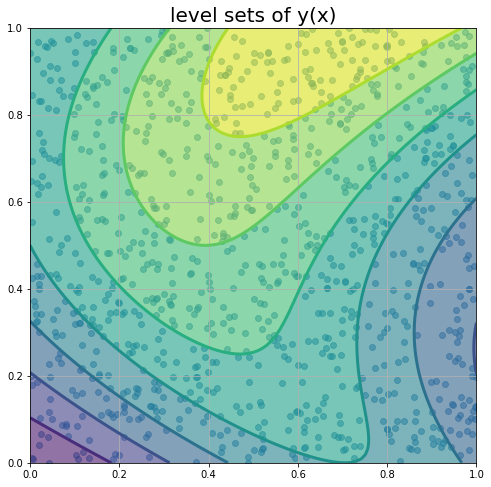

In [103]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.model_selection import train_test_split
from parc import PARC

np.random.seed(0)  # for reproducibility

K = 10
separation = 'Softmax'
# separation='Voronoi'
sigma = 1
alpha = 1.0e-3
beta = 1.0e-3
softmax_maxiter = 100000
maxiter = 15

N = 1000
test_size = 0.2

nx = 2
xmin = 0
xmax = 1
ymin = 0
ymax = 1
X = np.random.rand(N, nx) * np.array([xmax - xmin, ymax - ymin]) + np.array([xmin, ymin])

nyc = 1  # number of numeric outputs
noise_frac = 0.0  # noise standard deviation (0 = no noise)

f = lambda x1, x2: np.sin(4 * x1 - 5 * (x2 - 0.5) ** 2) + 2 * x2
Y = f(X[:, 0], X[:, 1]) + noise_frac * np.random.randn(N)
categorical = False
nlevels = 8

plt.close('all')
fig, ax = plt.subplots(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], alpha=0.5)
plt.grid()

dx = (xmax - xmin) / 100.0
dy = (ymax - ymin) / 100.0
[x1, x2] = np.meshgrid(np.arange(xmin, xmax + dx, dx), np.arange(ymin, ymax + dy, dy))
z = f(x1, x2)
plt.contourf(x1, x2, z, alpha=0.6, levels=nlevels)
plt.contour(x1, x2, z, linewidths=3.0, levels=nlevels)
plt.title('level sets of y(x)', fontsize=20)
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])
fig.show()

# Get random split of training/test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size)

predictor = PARC(K=K, alpha=alpha, sigma=sigma, separation=separation, maxiter=maxiter,
                 cost_tol=1e-4, min_number=10, fit_on_partition=True,
                 beta=beta, verbose=1)

Kf = predictor.K  # final number of partitions
delta = predictor.delta  # final assignment of training points to clusters
xbar = predictor.xbar  # centroids of final clusters

# Plot resulting PWA function
zpwl, _ = predictor.predict(np.hstack((x1.reshape(x1.size, 1), x2.reshape(x2.size, 1))))
zpwl = zpwl.reshape(x1.shape)

# plot level sets of PWA function
fig, ax = plt.subplots(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], alpha=0.5)
plt.grid()
ax.set_xlim([xmin, xmax])
ax.set_ylim([0, 1])
NN = x1.shape[0]
plt.contourf(x1, x2, zpwl, alpha=0.6, levels=nlevels)
plt.contour(x1, x2, zpwl, linewidths=3.0, levels=nlevels)
plt.title('PARC (K = %d)' % K, fontsize=20)
fig.show()

Yhtrain, _ = predictor.predict(X_train)
Yhtest, delta_test = predictor.predict(X_test)

fig, ax = plt.subplots(figsize=(8, 8))
for i in range(0, Kf):
    iD = (delta == i).ravel()
    plt.scatter(X_train[iD, 0], X_train[iD, 1], marker='*', linewidth=3,
                alpha=0.5, color=cm.tab10(i))
plt.grid()
plt.scatter(xbar[:, 0], xbar[:, 1], marker='o', linewidth=5, alpha=.5, color=(.8, .4, .4))

# Plot PWL partition
predictor.plot_partition([xmin, ymin], [xmax, ymax], fontsize=32,
                         ax=ax, alpha=.6, linestyle='-', linewidth=2.0, color=(1, 1, 1))
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])

plt.title('PARC (K = %d)' % K, fontsize=20)
fig.show()

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel(r'$x_1$', labelpad=15, fontsize=20)
ax.set_ylabel(r'$x_2$', labelpad=15, fontsize=20)
ax.set_zlabel(r'$y$', fontsize=20)
ax.scatter(X_test[:, 0], X_test[:, 1], Y_test, alpha=0.5)
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])
ax.plot_surface(x1, x2, z, alpha=0.5)
ax.view_init(35, -120)
plt.title('Nonlinear function', fontsize=20)
fig.show()

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel(r'$x_1$', labelpad=15, fontsize=20)
ax.set_ylabel(r'$x_2$', labelpad=15, fontsize=20)
ax.set_zlabel(r'$y$', fontsize=20)
for i in range(0, Kf):
    iD = (delta_test == i).ravel()
    ax.scatter(X_test[iD, 0], X_test[iD, 1], Y_test[iD], marker='*',
               linewidth=3, alpha=0.5, color=cm.tab10(i))

# plot PWA function
ax.plot_surface(x1, x2, zpwl, alpha=0.5)
ax.view_init(35, -120)
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])
plt.title('PARC (K = %d)' % K, fontsize=20)
fig.show()

#######################
# MIP Optimization
#######################
solveMIP = False
if solveMIP:
    Xmin = np.min(X, axis=0)
    Xmax = np.max(X, axis=0)
    yref = 3. * np.ones(nyc)  # desired target
    verbose = False
    solver = "CBC"
    # solver="GRB"
    x, y, region, f = predictor.optimize(Xmin, Xmax, yref, verbose=verbose, solver=solver)
    ax.scatter(x[0], x[1], y, marker='o', linewidth=10.0, color=(1, 0, 0))
    print("yhat = %5.4f, x1 = %5.4f, x2 = %5.4f" % (y, x[0], x[1]))


########################
# K-fold cross validation
########################
runCrossValidation = False
if runCrossValidation:
    bestK, results = predictor.cross_val(X_train, Y_train, categorical, Kfolds=5, Ks=[5, 10, 15])

In [96]:
Y_train.shape

(800,)